#### Universidad Autónoma de Aguascalientes
#### Departamento: Ciencias de la Computación
#### Carrera: Ingenieria en Computación Inteligente
#### Curso: Machine Learning y Deep Learning 
#### Maestro: Dr. Francisco Javier Luna Rosas

#### Alumno: Jorge Hernández
#### Semestre: Enero - Junio del 2025

##### Practica_X_Perceptron (Flor de Iris)

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

PASO 1: Importamos los datos del archivo con los datos de la flores, indicandole que tome como cabezera la primera linea que separe cada dato donde encuentre un punto y coma y que solo tome las primeras 100 columnas, debido a que solo 
trabajaremos con los dos primeros tipos de flores

In [25]:
df_iris = pd.read_csv('../Data/iris.csv',header=0,sep=';')
print(df_iris)

     s.largo  s.ancho  p.largo  p.ancho       tipo
0        5.1      3.5      1.4      0.2     setosa
1        4.9      3.0      1.4      0.2     setosa
2        4.7      3.2      1.3      0.2     setosa
3        4.6      3.1      1.5      0.2     setosa
4        5.0      3.6      1.4      0.2     setosa
..       ...      ...      ...      ...        ...
145      6.7      3.0      5.2      2.3  virginica
146      6.3      2.5      5.0      1.9  virginica
147      6.5      3.0      5.2      2.0  virginica
148      6.2      3.4      5.4      2.3  virginica
149      5.9      3.0      5.1      1.8  virginica

[150 rows x 5 columns]


In [26]:
from sklearn.preprocessing import LabelEncoder

x = np.array(df_iris.iloc[:,0:4])
y = df_iris["tipo"].to_numpy()

print(y)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

print(y)
encoder.classes_

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'v

array(['setosa', 'versicolor', 'virginica'], dtype=object)

PASO 3: Separaremos nuestros datos para utilizar una parte para pruebas y la otra para el entrenamiento 


In [28]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y, train_size=0.75, random_state=0,test_size=0.2)

PASO 4: Modelamos nuestra red

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [40]:
modelo = Sequential()

modelo.add(Dense(units = 40, activation='relu', input_shape=(4,)))
modelo.add(Dense(units = 20, activation='relu'))
modelo.add(Dense(units = 3, activation='sigmoid'))

modelo.compile(optimizer="adam",
               loss="sparse_categorical_crossentropy",
               metrics=['accuracy'])

c:\Users\JORGE\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
modelo.fit(xTrain, yTrain, epochs=200, batch_size=16, verbose=0)

In [46]:
loss, acc = modelo.evaluate(xTest,yTest, verbose=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 1.0000 - loss: 0.0194


In [51]:
print(acc)

1.0


In [52]:
pred = modelo.predict(xTest)
pred[0:37]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[2.6899798e-09, 2.0246824e-02, 9.9874073e-01],
       [2.1223852e-03, 9.8608452e-01, 5.9412606e-03],
       [9.9999678e-01, 5.3573829e-01, 4.9429400e-07],
       [5.4416565e-09, 9.8125547e-02, 9.9153990e-01],
       [9.9998575e-01, 6.5966868e-01, 2.0983580e-06],
       [6.7126665e-10, 1.8425217e-02, 9.9927324e-01],
       [9.9998826e-01, 6.3796508e-01, 1.8750964e-06],
       [5.2585183e-05, 9.7027969e-01, 2.5624221e-02],
       [3.8876467e-05, 9.6252894e-01, 3.5496231e-02],
       [9.5571781e-04, 9.8651195e-01, 5.8987928e-03],
       [8.0624818e-07, 4.4267419e-01, 8.7181270e-01],
       [9.9549208e-05, 9.7581536e-01, 1.8861359e-02],
       [1.0630825e-04, 9.5638949e-01, 4.3679249e-02],
       [3.0760253e-05, 9.4295430e-01, 6.1936852e-02],
       [2.9984965e-05, 9.1106802e-01, 1.1877033e-01],
       [9.9997932e-01, 6.9586897e-01, 2.5802879e-06],
       [3.0283749e-05, 9.0672880e-01, 1.2179045e-01],
       [1.6931386e-04, 9.3870723e-01, 6.8491817e-02],
       [9.9996197e-01, 7.229

In [ ]:
y_pred_class = np.argmax(pred, axis=1)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


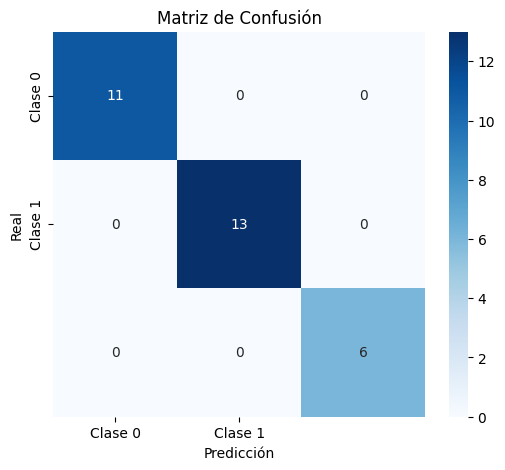

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(yTest, y_pred_class)
# Visualización de la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()